In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [138]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [139]:
diabetes_dataset.shape

(768, 9)

In [140]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [141]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [142]:
#diabetes_dataset.groupby("Outcome").mean()

In [143]:
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [144]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

#Predict
svc_pred = svc_model.predict(X_test)

#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

Accuracy Score = 0.7401574803149606
[[143  19]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       162
           1       0.70      0.49      0.58        92

    accuracy                           0.74       254
   macro avg       0.73      0.69      0.69       254
weighted avg       0.73      0.74      0.73       254



In [145]:
#RandomForest
from sklearn.impute import SimpleImputer
import numpy as np
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)
fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
# On training data
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

predictions = rfc.predict(X_test)
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy_Score = 1.0
Accuracy_Score = 0.7598425196850394
[[132  30]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       162
           1       0.67      0.66      0.67        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



In [146]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)


from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy Score = 0.7283464566929134
[[127  35]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       162
           1       0.62      0.63      0.63        92

    accuracy                           0.73       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.73      0.73      0.73       254



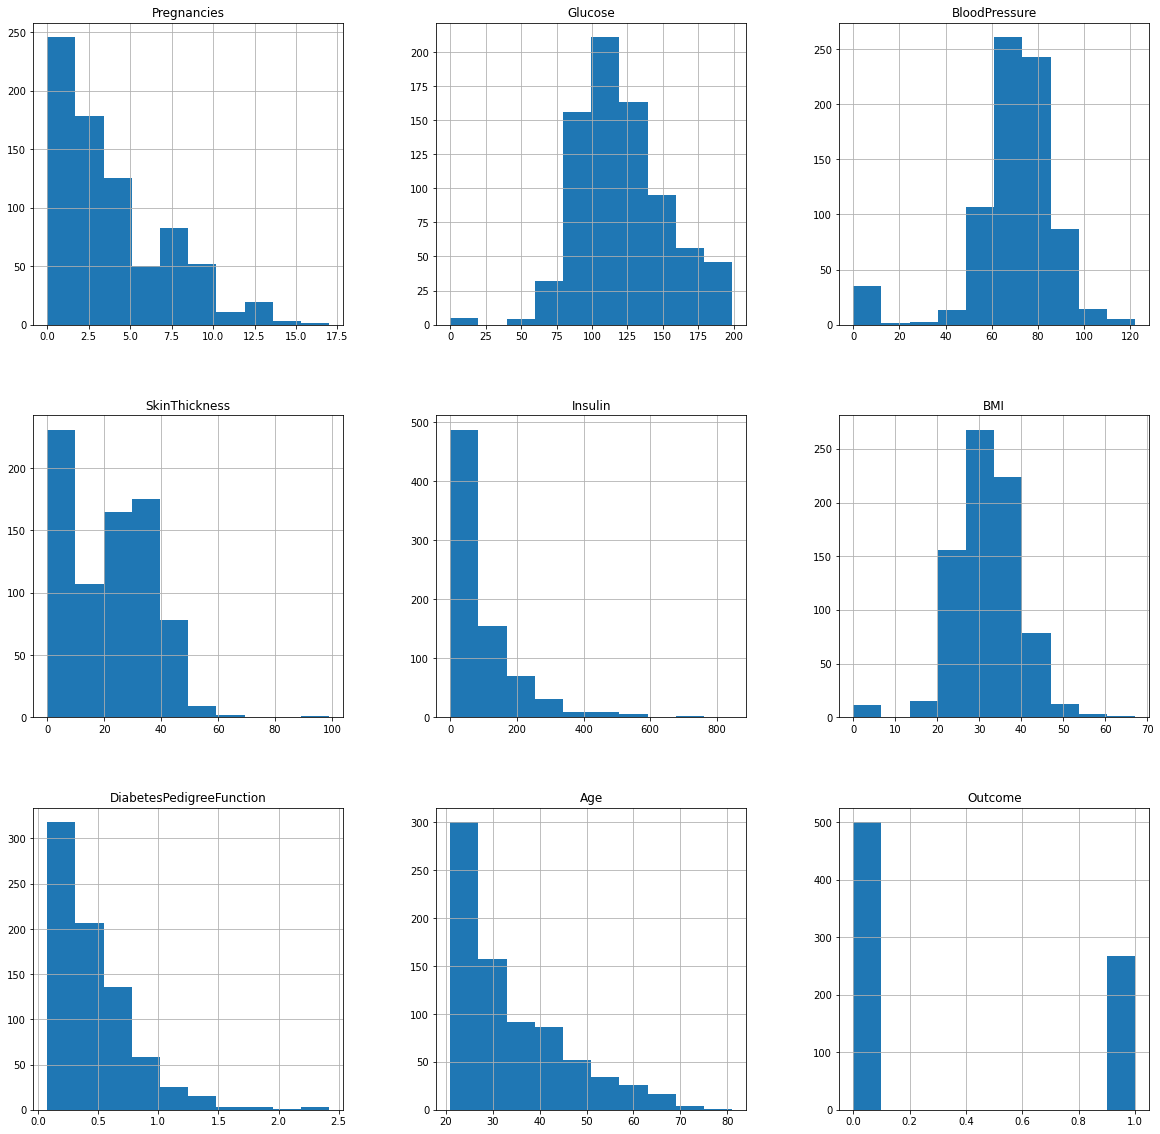

In [147]:
p = diabetes_dataset.hist(figsize=(20, 20))

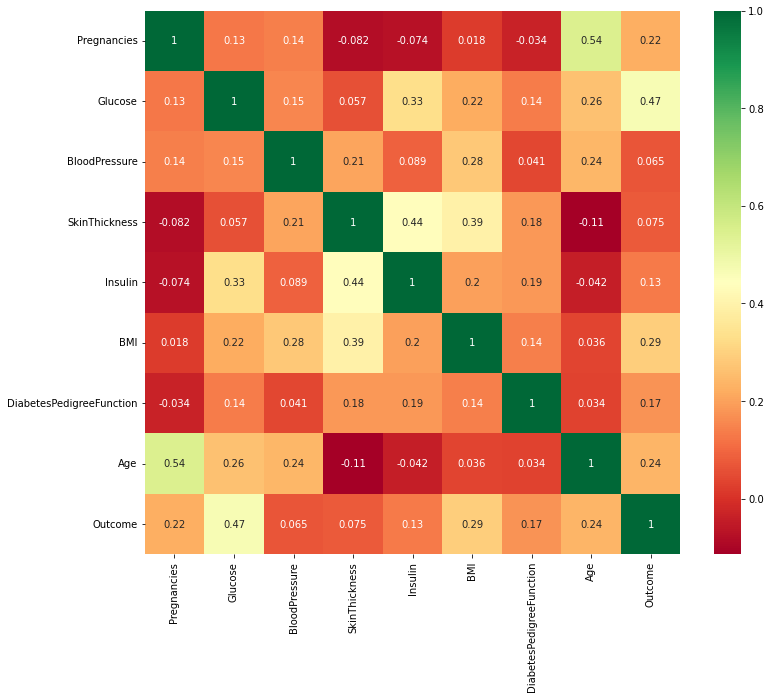

In [148]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

In [150]:
preg = input("Pregnancies: ")
gluc = input("Glucose: ")
bp = input("Blood Pressure: ")
skint = input("Skin Thickness: ")
insulin = input("Insulin: ")
bmi = input("BMI: ")
dpf = input("DiabetesPedigreeFunction: ")
age = input("Age: ")

input_data = (preg, gluc, bp, skint, insulin, bmi, dpf, age)

numpy_arr = np.asarray(input_data)

reshaped_data = numpy_arr.reshape(1,-1)


std_data = scalar.transform(reshaped_data) 
print(std_data)

prediction = classifier.predict(std_data)

print(prediction)

if(prediction[0] == 0): 
    print("Not Diabetic") 

else:
    print("Diabetic")

c:\Users\saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: ''